In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_excel('./all_days_stats_by_currencies.xlsx')
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.set_index('Fecha', inplace=True)
df.sort_index(inplace=True)
df.head(10)

,Moneda,Id,Oferta
Fecha,,,
2021-01-02 13:00:02,USD,61acb42dab932e127b42177e,50.0
2021-01-07 19:12:15,USD,61acb883bc2bca1ccad3d63d,49.0
2021-01-09 03:15:10,USD,61acb948bc2bca1ccad3d7a5,40.0
2021-01-10 20:44:38,USD,61acba13bc2bca1ccad3d92f,37.5
2021-01-14 20:04:20,USD,61acb241ab932e127b4212c9,42.0
2021-01-20 18:28:01,MLC,61acbe52bc2bca1ccad3e231,42.5
2021-01-21 03:23:10,MLC,61acbec3bc2bca1ccad3e2f3,42.5
2021-01-21 15:50:40,MLC,61acbf09bc2bca1ccad3e3fc,45.0
2021-01-22 18:57:31,MLC,61acbf4abc2bca1ccad3e466,43.0


In [78]:
def get_lower_upper_bond_iql(values):
    q1 = np.quantile(values, 0.25)
    q3 = np.quantile(values, 0.75)

    lower_iqd = q1 - 1.5*(q3-q1)
    upper_iqd = q3 + 1.5*(q3-q1)

    return lower_iqd, upper_iqd


def get_mean_without_outliers_iql(ti):
    if ti.values.shape[0] < 1:
        return np.NaN

    lower_iqd, upper_iqd = get_lower_upper_bond_iql(ti.values)

    new_ti = ti[(ti>=lower_iqd) & (ti<=upper_iqd)]

    return new_ti.mean()

def get_median_without_outliers_iql(ti):
    if ti.values.shape[0] < 1:
        return np.NaN

    lower_iqd, upper_iqd = get_lower_upper_bond_iql(ti.values)

    new_ti = ti[(ti>=lower_iqd) & (ti<=upper_iqd)]

    return new_ti.median()

def get_lower_upper_bond_std(ti, show_std=False):
    std = ti.std()
    if show_std:
        print('La Desviación Standard es', std)
    m = np.median(ti)
    return m-3*std, m+3*std

def get_median_without_outliers_std(ti):
    if ti.values.shape[0] < 1:
        return np.NaN

    lower_iqd, upper_iqd = get_lower_upper_bond_std(ti.values)

    new_ti = ti[(ti>=lower_iqd) & (ti<=upper_iqd)]

    return new_ti.median()

def get_mean_without_outliers_std(ti):
    if ti.values.shape[0] < 1:
        return np.NaN

    lower_iqd, upper_iqd = get_lower_upper_bond_std(ti.values)

    new_ti = ti[(ti>=lower_iqd) & (ti<=upper_iqd)]

    return new_ti.mean()


daily_mean_iql = df.groupby('Moneda').resample('d').agg({'Oferta':get_mean_without_outliers_iql})
daily_mean_std = df.groupby('Moneda').resample('d').agg({'Oferta':get_mean_without_outliers_std})
daily_median_iql = df.groupby('Moneda').resample('d').agg({'Oferta':get_median_without_outliers_iql})
daily_median_std = df.groupby('Moneda').resample('d').agg({'Oferta':get_median_without_outliers_std})

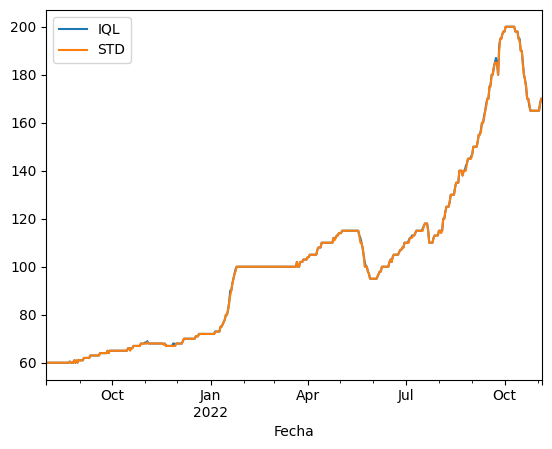

In [3]:
daily_median_iql_usd = daily_median_iql.loc['USD'][daily_median_iql.loc['USD'].index > pd.to_datetime('31/7/2021', dayfirst=True)]
daily_median_std_usd = daily_median_std.loc['USD'][daily_median_std.loc['USD'].index > pd.to_datetime('31/7/2021', dayfirst=True)]


daily_median_iql_usd.Oferta.plot(label='IQL')
daily_median_std_usd.Oferta.plot(label='STD')
plt.legend()

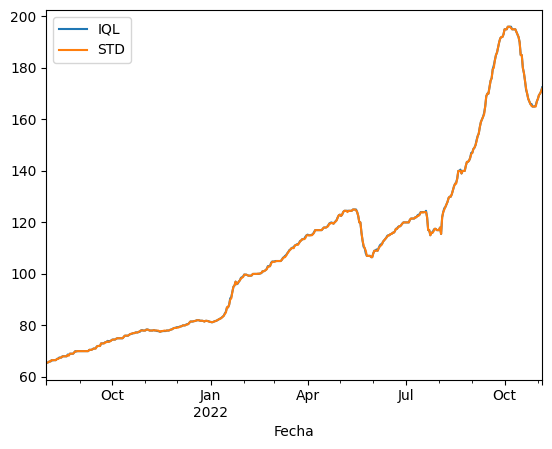

In [4]:
daily_median_iql_usd = daily_median_iql.loc['MLC'][daily_median_iql.loc['MLC'].index > pd.to_datetime('31/7/2021', dayfirst=True)]
daily_median_std_usd = daily_median_std.loc['MLC'][daily_median_std.loc['MLC'].index > pd.to_datetime('31/7/2021', dayfirst=True)]


daily_median_iql_usd.Oferta.plot(label='IQL')
daily_median_std_usd.Oferta.plot(label='STD')
plt.legend()

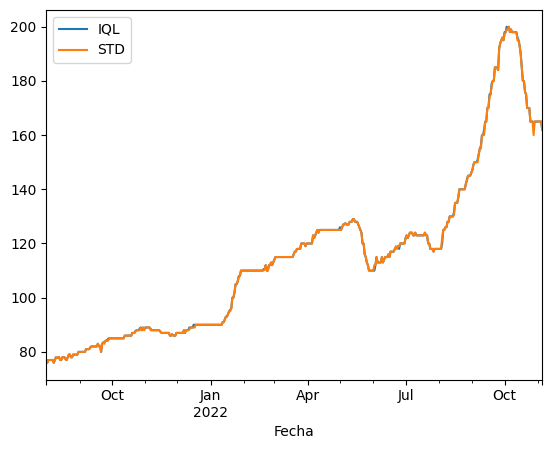

In [5]:
daily_median_iql_usd = daily_median_iql.loc['ECU'][daily_median_iql.loc['ECU'].index > pd.to_datetime('31/7/2021', dayfirst=True)]
daily_median_std_usd = daily_median_std.loc['ECU'][daily_median_std.loc['ECU'].index > pd.to_datetime('31/7/2021', dayfirst=True)]


daily_median_iql_usd.Oferta.plot(label='IQL')
daily_median_std_usd.Oferta.plot(label='STD')
plt.legend()


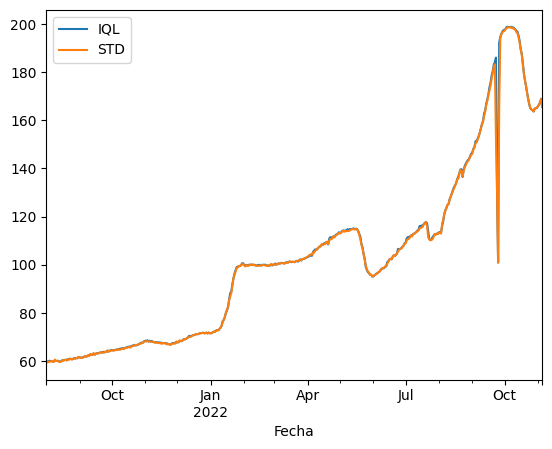

In [6]:
daily_mean_iql_usd = daily_mean_iql.loc['USD'][daily_mean_iql.loc['USD'].index > pd.to_datetime('31/7/2021', dayfirst=True)]
daily_mean_std_usd = daily_mean_std.loc['USD'][daily_mean_std.loc['USD'].index > pd.to_datetime('31/7/2021', dayfirst=True)]


daily_mean_iql_usd.Oferta.plot(label='IQL')
daily_mean_std_usd.Oferta.plot(label='STD')
plt.legend()

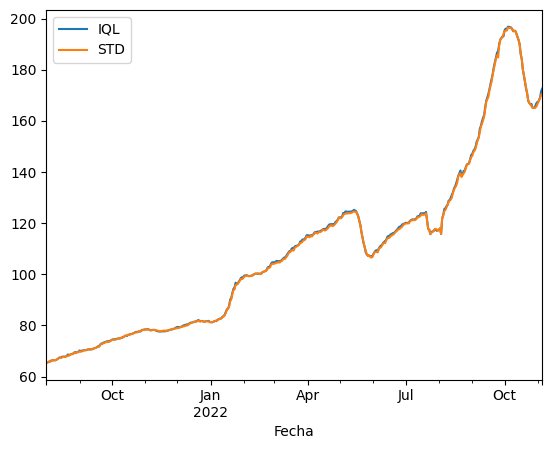

In [7]:
daily_mean_iql_usd = daily_mean_iql.loc['MLC'][daily_mean_iql.loc['MLC'].index > pd.to_datetime('31/7/2021', dayfirst=True)]
daily_mean_std_usd = daily_mean_std.loc['MLC'][daily_mean_std.loc['MLC'].index > pd.to_datetime('31/7/2021', dayfirst=True)]


daily_mean_iql_usd.Oferta.plot(label='IQL')
daily_mean_std_usd.Oferta.plot(label='STD')
plt.legend()

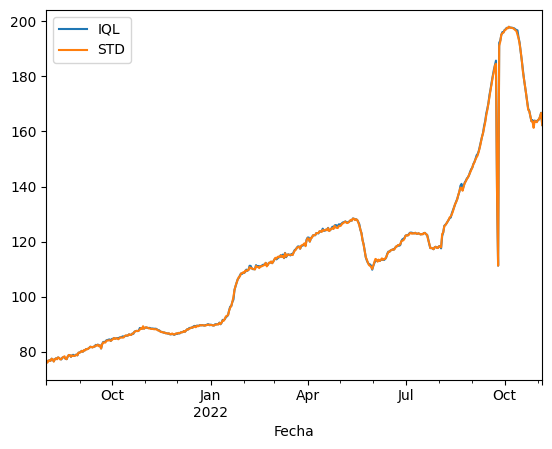

In [8]:
daily_mean_iql_usd = daily_mean_iql.loc['ECU'][daily_mean_iql.loc['ECU'].index > pd.to_datetime('31/7/2021', dayfirst=True)]
daily_mean_std_usd = daily_mean_std.loc['ECU'][daily_mean_std.loc['ECU'].index > pd.to_datetime('31/7/2021', dayfirst=True)]


daily_mean_iql_usd.Oferta.plot(label='IQL')
daily_mean_std_usd.Oferta.plot(label='STD')
plt.legend()

<AxesSubplot:xlabel='Fecha'>

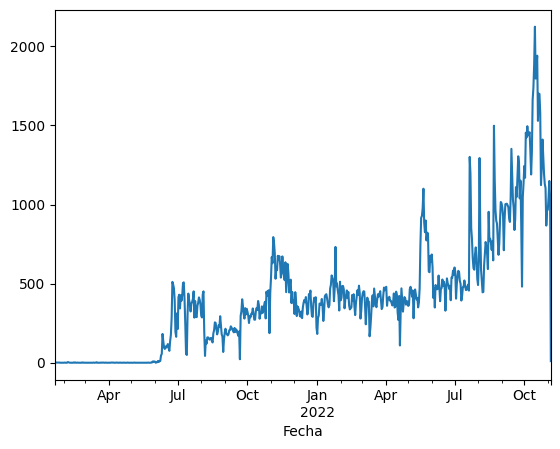

In [9]:
def number_people(ti):
   return ti.shape[0]

part = df.groupby('Moneda').resample('d').agg({'Oferta':number_people})
part.loc['MLC'].Oferta.plot()

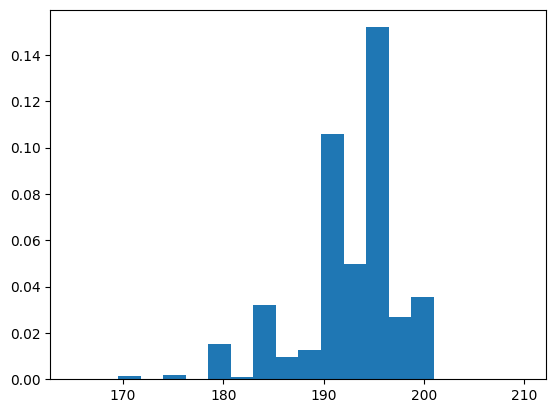

<AxesSubplot:xlabel='Fecha'>

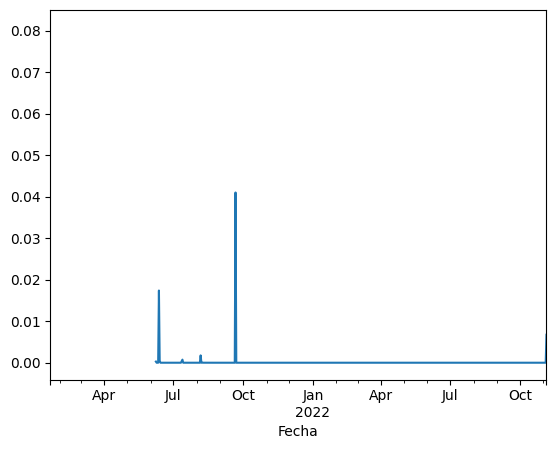

In [10]:
from scipy.stats import shapiro


i = 2300
def detecting_normality(ti):
    if ti.values.shape[0] < 10:
        return np.NaN

    lower_iqd, upper_iqd = get_lower_upper_bond_std(ti.values)

    new_ti = ti[(ti>=lower_iqd) & (ti<=upper_iqd)]

    if new_ti.shape[0] >= i:
        plt.hist(new_ti, bins=20, density=True)
        plt.show()

    return shapiro(new_ti).pvalue

pvalue = df.groupby('Moneda').resample('d').agg({'Oferta':detecting_normality})
pvalue.loc['MLC'].Oferta.plot()

(2112,)


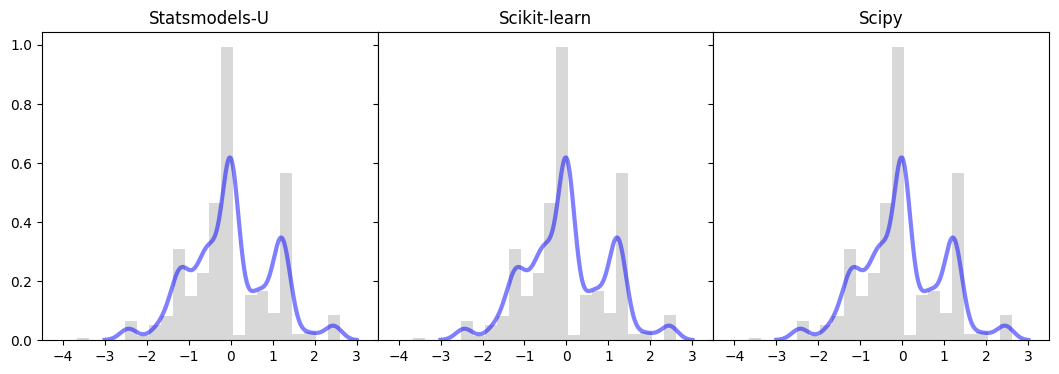

(2137,)


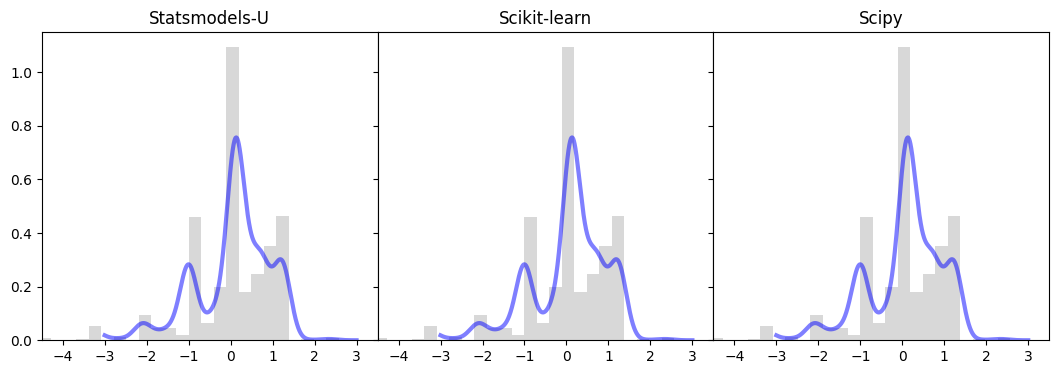

(2395,)


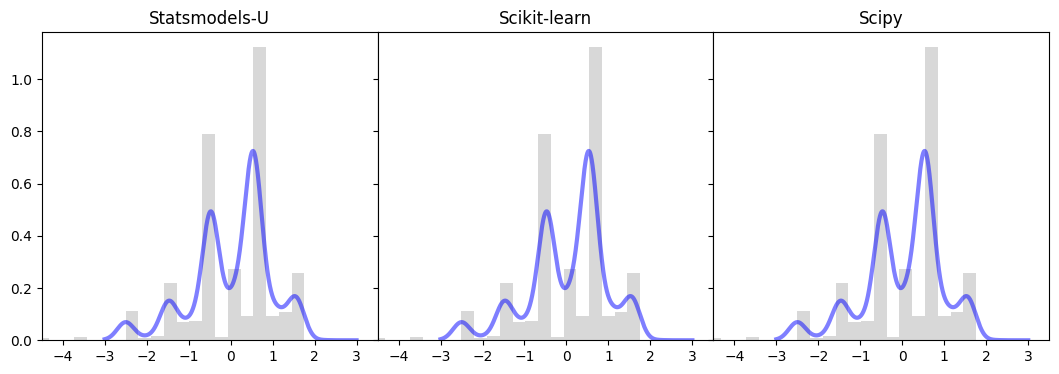

(2186,)


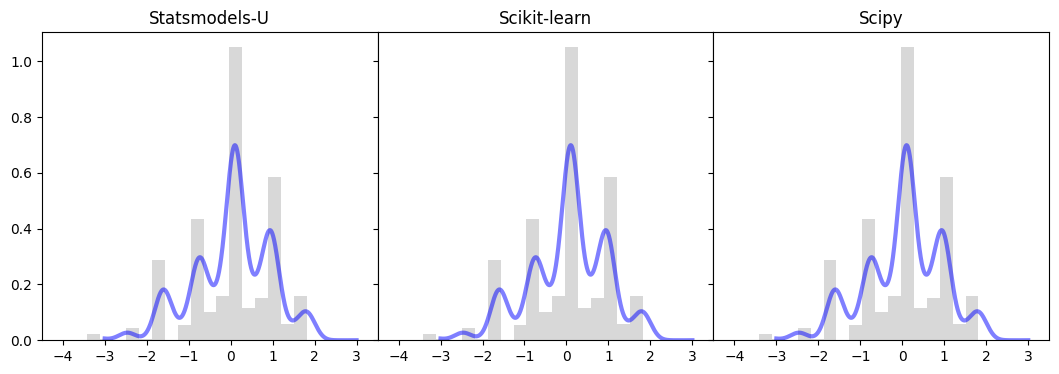

(2227,)


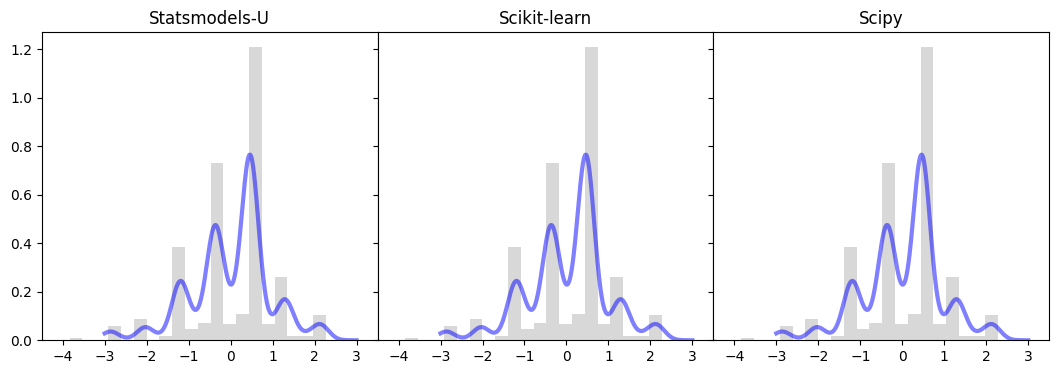

(2289,)


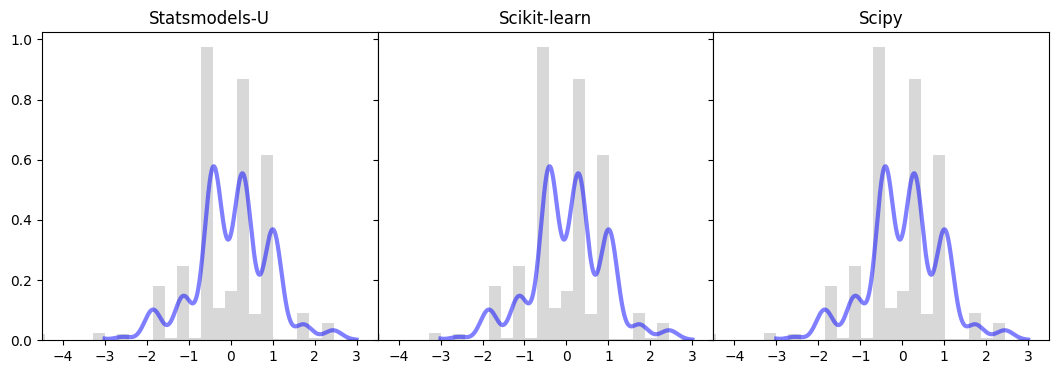

(2152,)


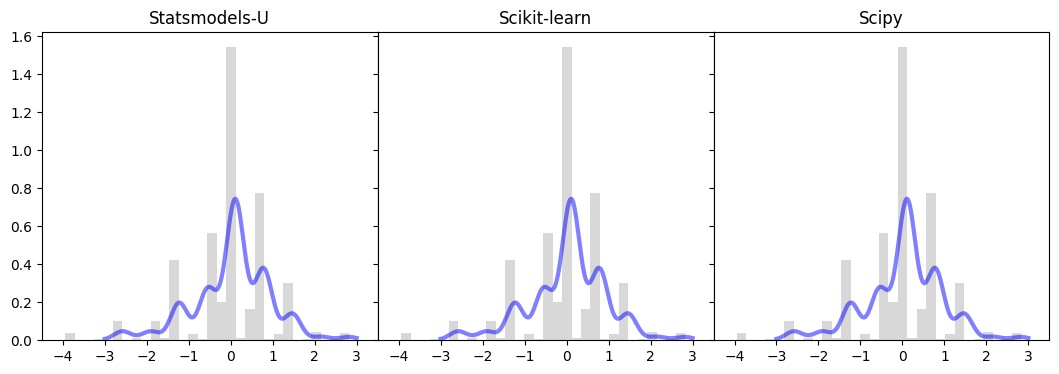

(2053,)


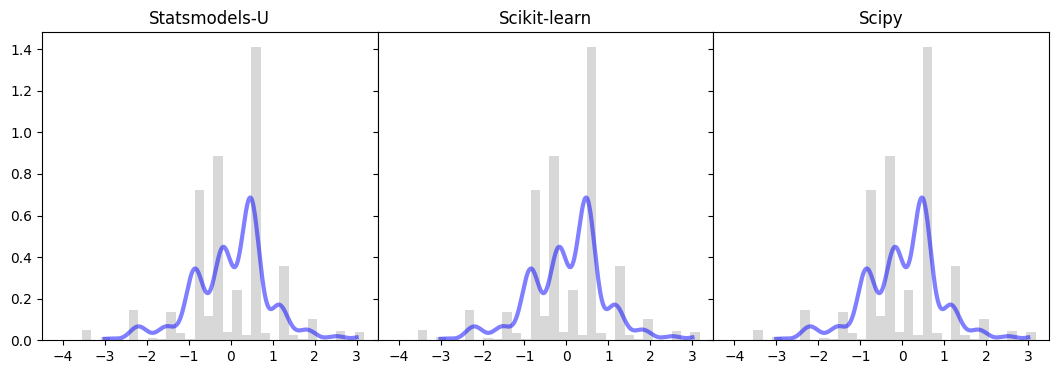

In [15]:
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from sklearn.preprocessing import StandardScaler

def kde_scipy(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)


def kde_statsmodels_u(x, x_grid, bandwidth=0.2, **kwargs):
    """Univariate Kernel Density Estimation with Statsmodels"""
    kde = KDEUnivariate(x)
    kde.fit(bw=bandwidth, **kwargs)
    return kde.evaluate(x_grid)

def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)


kde_funcs = [kde_statsmodels_u, kde_sklearn, kde_scipy]
kde_funcnames = ['Statsmodels-U', 'Scikit-learn', 'Scipy']


def show_kde(ti):
    if ti.values.shape[0] < 10:
        return np.NaN

    lower_iqd, upper_iqd = get_lower_upper_bond_std(ti.values)

    new_ti = ti[(ti>=lower_iqd) & (ti<=upper_iqd)]

    if new_ti.shape[0] >= 2000:
        # The grid we'll use for plotting
        x_grid = np.linspace(-3, 3, new_ti.values.shape[0])
        scaler = StandardScaler()
        new_ti = scaler.fit_transform(new_ti.values.reshape(-1, 1))[:, 0]
        print(new_ti.shape)
        # # Draw points from a bimodal distribution in 1D
        # np.random.seed(0)
        # # x = np.concatenate([norm(-1, 1.).rvs(400), norm(1, 0.3).rvs(100)])
        # # pdf_true = (0.8 * norm(-1, 1).pdf(x_grid) + 0.2 * norm(1, 0.3).pdf(x_grid))
        #
        # # Plot the three kernel density estimates
        fig, ax = plt.subplots(1, 3, sharey=True, figsize=(13, 4))
        fig.subplots_adjust(wspace=0)
        #
        for j in range(3):
            pdf = kde_funcs[j](new_ti, x_grid, bandwidth=0.2)
            ax[j].plot(x_grid, pdf, color='blue', alpha=0.5, lw=3)
            ax[j].hist(new_ti, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
            ax[j].set_title(kde_funcnames[j])
            ax[j].set_xlim(-4.5, 3.5)
        plt.show()

df.groupby('Moneda').resample('d').agg({'Oferta':show_kde});


# Simulaciones

Simulemos que el algoritmo recibe un ataque adversario un día determinado.
La pregunta es: cuánto se verá afectada la tasa de referencia ante diferentes ataques?
En el algoritmo de abajo, podemos simular datos siendo posteados por los usuarios reales
y una proporción de datos siendo generada por usuarios ficticios. Para generar los valores de los usuarios reales he usado el análisis de la variación anteriormente realizado.
Por ejemplo,
simulemos que los datos de 2000 usuarios han sido coleccionados y de ellos, el 60% han posteados datos
alrededor de los 120 pesos, mientras que el 40% ha tratado de engañar el sistema y a puestos valores bien alejados por ejemplo 70 pesos.
En la simulación seguimos la metodología del Toque para generar la mediana y eliminar los valores anómalos.

La Desviación Standard es 25.12890034997296


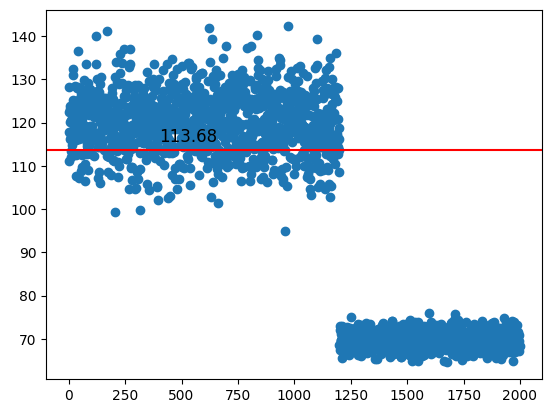

In [87]:
from sklearn.neighbors import KernelDensity
from numpy import random, array
import matplotlib.pyplot as plt

random.seed(135)
def prepData(N, true_mean=120, false_mean=70, p=1/2):
    X = []
    for i in range(n):
        if i < N*p:
            A = true_mean + random.normal(0, 7)
        else:
            A = false_mean + random.normal(0, 2)

        X.append(A)
    return array(X)

n=2000
X = prepData(n, 120, 70, p=6/10).reshape((-1, 1))

lower_iqd, upper_iqd = get_lower_upper_bond_std(X, True)

X = X[(X>=lower_iqd) & (X<=upper_iqd)]

x_ax = range(n)
plt.scatter(x_ax, X)
plt.axhline(y=np.median(X), color='red')
plt.text(400, np.median(X)+2, np.round(np.median(X), 2), fontsize=12)
plt.show()

La gráfica muestra que la mediana (en rojo) ha sido solamente levemente afectada. Eso es precisamente gracias a que la mediana es usada como métrica.
La mediana tiene la ventaja de ser resistente a las anomalías. Por otra parte, podemos ver que los valores alrededor de 70 han sido reconocidos como parte del grupo de valores válidos y **NO** como anómalos.
En este caso, el valor de la mediana es lo suficientemente cerca del valor real que el impacto no es considerable. Aunque, en algunos escenarios, esa diferencia de 7 pesos puede ser considerada bastante alta.
Independientemente de si es importante o no, la verdad es que los atacantes no tienen efecto en la mediana.

**Lemma:** No importa el valor en que los atacantes decidan declarar el valor falso de la tasa de referencia, el impacto depende única y exclusivamente de cuantos atacas son

Por ejemplo, en la siguiente simulación el valor 50 es usado como el falso mientras que la misma proporción de atacantes se mantiene.

La Desviación Standard es 34.6765987464413


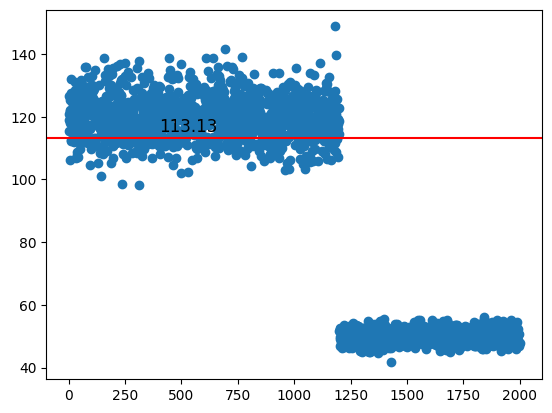

In [98]:
X = prepData(n, 120, 50, p=6/10).reshape((-1, 1))

lower_iqd, upper_iqd = get_lower_upper_bond_std(X, True)

X = X[(X>=lower_iqd) & (X<=upper_iqd)]

x_ax = range(X.shape[0])
plt.scatter(x_ax, X)
plt.axhline(y=np.median(X), color='red')
plt.text(400, np.median(X)+2, np.round(np.median(X), 2), fontsize=12)
plt.show()

Claramente, comparado con la simulación anterior, no vemos una diferencia significativa del valor medio.
¿Pero, que pasa cuando el número de atacantes incrementa a un 50%?

La Desviación Standard es 35.41226085887507


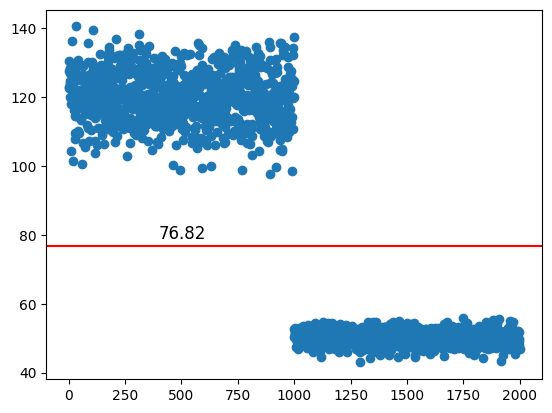

In [99]:
X = prepData(n, 120, 50, p=5/10).reshape((-1, 1))

lower_iqd, upper_iqd = get_lower_upper_bond_std(X, True)

X = X[(X>=lower_iqd) & (X<=upper_iqd)]

x_ax = range(X.shape[0])
plt.scatter(x_ax, X)
plt.axhline(y=np.median(X), color='red')
plt.text(400, np.median(X)+2, np.round(np.median(X), 2), fontsize=12)
plt.show()

Bueno, ahora si el impacto en la mediana es innegable. Si seguimos aumentando la proporción de atacantes,
el impacto sigue aumentando.

La Desviación Standard es 18.763645515264407


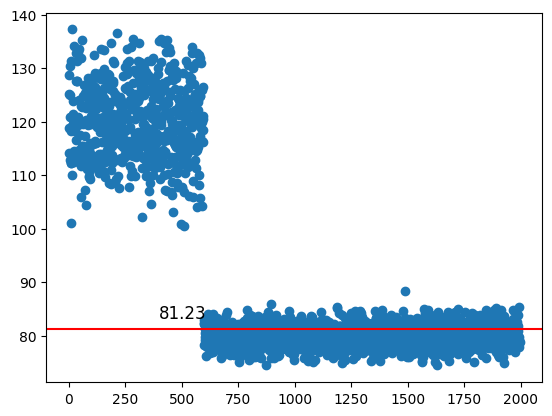

In [102]:
X = prepData(n, 120, 80, p=3/10).reshape((-1, 1))

lower_iqd, upper_iqd = get_lower_upper_bond_std(X, True)

X = X[(X>=lower_iqd) & (X<=upper_iqd)]

x_ax = range(X.shape[0])
plt.scatter(x_ax, X)
plt.axhline(y=np.median(X), color='red')
plt.text(400, np.median(X)+2, np.round(np.median(X), 2), fontsize=12)
plt.show()